In [1]:
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
class LinearRegression(d2l.Module):  #@save
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1)
        self.net.weight.data.normal_(0, 0.01)
        self.net.bias.data.fill_(0)

In [3]:
@d2l.add_to_class(LinearRegression)  #@save
def forward(self, X):
    return self.net(X)

In [23]:
# @d2l.add_to_class(LinearRegression)  #@save
# def loss(self, y_hat, y):
#     fn = nn.MSELoss()
#     return fn(y_hat, y)

@d2l.add_to_class(LinearRegression)  #@save
def loss(self, y_hat, y):
    eps = 0.01
    
    mask1 = (y_hat - y >= eps).float()
    l1 = (torch.abs(y_hat - y) - torch.full(y_hat.shape, eps / 2)) * mask1

    mask2 = (y_hat - y < eps).float()
    l2 = ((y_hat - y) ** 2 / 2 / eps) * mask2
    
    l = l1 + l2
    return l.mean()

In [24]:
@d2l.add_to_class(LinearRegression)  #@save
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr)

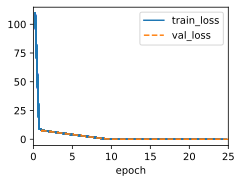

In [27]:
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=25)
trainer.fit(model, data)

In [28]:
@d2l.add_to_class(LinearRegression)  #@save
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)
w, b = model.get_w_b()

print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

error in estimating w: tensor([0.0307, 0.0064])
error in estimating b: tensor([-0.0194])
